In [20]:
import sys
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
def plot_classifier(classifier, X, y):
    # 定义数值的范围
    x_min, x_max = min(X[:, 0])-1.0, max(X[:, 0])+1.0
    y_min, y_max = min(X[:, 1])-1.0, max(X[:, 1])+1.0
    
    # 网格绘图
    step_size = 0.01
    x_values, y_values = np.meshgrid(np.arange(x_min, x_max, step_size), np.arange(y_min, y_max, step_size))
    
    mesh_output = classifier.predict(np.c_[x_values.ravel(), y_values.ravel()])
    mesh_output = mesh_output.reshape(x_values.shape)
    
    plt.figure()
    plt.pcolormesh(x_values, y_values, mesh_output, cmap=plt.cm.gray)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=80, edgecolors='black', linewidths=1, cmap=plt.cm.Paired)
    
    plt.xlim(x_values.min(), x_values.max())
    plt.ylim(y_values.min(), y_values.max())
    
    plt.xticks((np.arange(int(min(X[:, 0]) -1), int(max(X[:,0])+1), 1.0)))
    plt.yticks((np.arange(int(min(X[:, 1]) -1), int(max(X[:,1])+1), 1.0)))
    
    plt.show()

In [13]:
def load_data():
    X, y = [], []
    filename = "data_multivar.txt"
    with open(filename, 'r') as f:
        for line in f:
            data = [float(i) for i in line.split(',')]
            X.append(data[:-1])
            y.append(data[-1])
            
    X, y = np.array(X), np.array(y)
    return X, y

In [14]:
classifier_gaussiannb = GaussianNB()
X, y = load_data()
classifier_gaussiannb.fit(X, y)
y_pred = classifier_gaussiannb.predict(X)
accuracy = 100.0* (y==y_pred).sum()/X.shape[0]
print("准确率是: ", round(accuracy, 2))

准确率是:  99.5


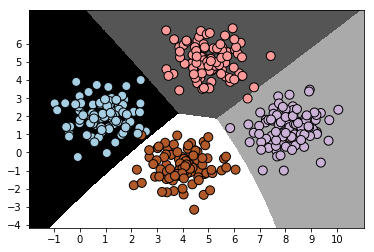

In [15]:
plot_classifier(classifier_gaussiannb, X,y)

## 数据分为训练集和测试集


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)
classifier_gaussiannb_new = GaussianNB()
classifier_gaussiannb_new.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [17]:
y_test_pred = classifier_gaussiannb_new.predict(X_test)
accuracy = 100.0* (y_test==y_test_pred).sum()/X_test.shape[0]
print("准确率是: ", round(accuracy, 2))

准确率是:  99.0


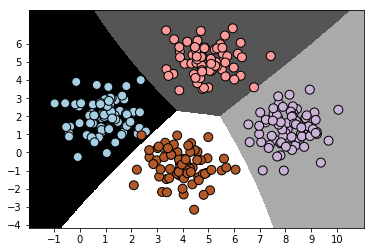

In [18]:
plot_classifier(classifier_gaussiannb_new, X_train,y_train)

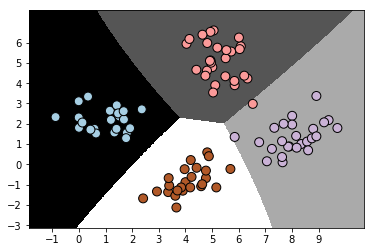

In [19]:
plot_classifier(classifier_gaussiannb_new, X_test,y_test)

# 交叉验证

In [23]:
num_validation = 10
accuracy = cross_val_score(classifier_gaussiannb, X, y, scoring="accuracy", cv=num_validation)
print("准确率是: ", round(100.0*accuracy.mean(), 2))

准确率是:  99.5


In [25]:
f1 = cross_val_score(classifier_gaussiannb, X, y, scoring="f1_weighted", cv=num_validation)
print("F1: ", round(100.0*f1.mean(), 2))

F1:  99.5


In [27]:
precision = cross_val_score(classifier_gaussiannb, X, y, scoring="precision_weighted", cv=num_validation)
recall = cross_val_score(classifier_gaussiannb, X, y, scoring="recall_weighted", cv=num_validation)
print("precision: ", round(100.0*precision.mean(), 2))
print("recall: ", round(100.0*recall.mean(), 2))

precision:  99.55
recall:  99.5
